### Question:
Demonstrate how to **use conditional workflows in LangGraph** to determine whether the roots of a **quadratic equation (ax² + bx + c = 0)** are **real and distinct, real and equal, or complex**.


In [20]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict,Literal
import os

In [21]:
# define state

class QuadState(TypedDict):
     
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [22]:
def show_equation(state: QuadState) -> QuadState:
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"

    return {
       
        "equation": equation
    }

In [23]:
def calculate_discriminant(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = b**2 - 4*a*c

    return {
        "discriminant": discriminant
    }

In [24]:
def real_roots_node(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = state['discriminant']

    root1 = (-b + discriminant**0.5) / (2*a)
    root2 = (-b - discriminant**0.5) / (2*a)

    result = f"The equation has two real roots: {root1} and {root2}."

    return {
        "result": result
    }

In [25]:
def complex_roots_node(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = state['discriminant']

    real_part = -b / (2*a)
    imaginary_part = (-discriminant)**0.5 / (2*a)

    root1 = f"{real_part} + {imaginary_part}i"
    root2 = f"{real_part} - {imaginary_part}i"

    result = f"The equation has two complex roots: {root1} and {root2}."

    return {
        "result": result
    }

In [26]:
def equal_roots_node(state: QuadState) -> QuadState:
    a = state['a']
    b = state['b']
    c = state['c']
    discriminant = state['discriminant']

    root = -b / (2*a)

    result = f"The equation has one real root (a double root): {root}."

    return {
        "result": result
    }

In [27]:
def check_discriminant(state: QuadState) -> Literal["real_roots", "equal_roots", "complex_roots"]:
    discriminant = state['discriminant']
    if discriminant > 0:
        return "real_roots"
    elif discriminant == 0:
        return "equal_roots"
    else:
        return "complex_roots"

# Workflow

<img src="eqn.png" width = 450px, height = 300px>

In [ ]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots_node)
graph.add_node('complex_roots', complex_roots_node)
graph.add_node('equal_roots', equal_roots_node)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant', check_discriminant)  # here we add conditional edges based on discriminant
graph.add_edge('real_roots', END)
graph.add_edge('complex_roots', END)
graph.add_edge('equal_roots', END)
workflow = graph.compile()


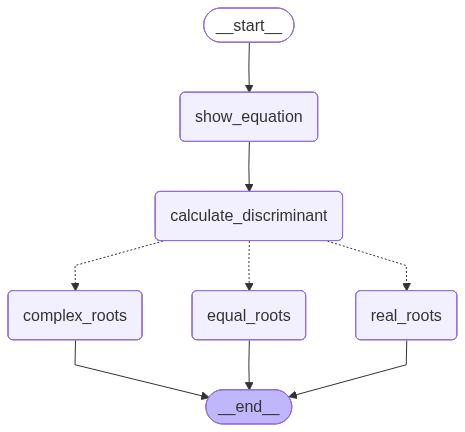

In [29]:
workflow

In [36]:
# define intial state

initial_state = {
    "a": 1,
    "b": -3,
    "c": 4
}

In [37]:
final_state = workflow.invoke(initial_state)

In [38]:
print(final_state)

{'a': 1, 'b': -3, 'c': 4, 'equation': '1x^2 + -3x + 4 = 0', 'discriminant': -7, 'result': 'The equation has two complex roots: 1.5 + 1.3228756555322954i and 1.5 - 1.3228756555322954i.'}
